In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
df = pd.read_csv("K:/DATA SCIENCE/DataSets/purchase_data.csv")
df

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN
...,...,...,...,...,...,...,...,...
24994,29/11/2018,33699,513,credit,55.89,45.1,7,NaN
24995,29/11/2018,38652,501,paypal,136.27,61.0,11,NaN
24996,29/11/2018,30222,504,paypal,427.45,52.8,45,NaN
24997,29/11/2018,30183,507,credit,981.81,58.2,76,NaN


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df


C:\Users\siddh\AppData\Local\Temp\ipykernel_20528\2459742912.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7,year,month,day
0,2018-11-20,37077,505,credit,49.53,12.0,8,NaN,2018,11,20
1,2018-11-20,59173,509,paypal,50.61,25.9,8,NaN,2018,11,20
2,2018-11-20,41066,507,credit,85.99,34.9,11,NaN,2018,11,20
3,2018-11-20,50741,506,credit,34.60,16.5,9,NaN,2018,11,20
4,2018-11-20,53639,515,paypal,266.27,43.1,30,NaN,2018,11,20
...,...,...,...,...,...,...,...,...,...,...,...
24994,2018-11-29,33699,513,credit,55.89,45.1,7,NaN,2018,11,29
24995,2018-11-29,38652,501,paypal,136.27,61.0,11,NaN,2018,11,29
24996,2018-11-29,30222,504,paypal,427.45,52.8,45,NaN,2018,11,29
24997,2018-11-29,30183,507,credit,981.81,58.2,76,NaN,2018,11,29


In [5]:

df.drop(['Unnamed: 7'], axis=1, inplace=True)
df.drop(['date'], axis=1, inplace=True)


In [6]:
df

,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,year,month,day
0,37077,505,credit,49.53,12.0,8,2018,11,20
1,59173,509,paypal,50.61,25.9,8,2018,11,20
2,41066,507,credit,85.99,34.9,11,2018,11,20
3,50741,506,credit,34.60,16.5,9,2018,11,20
4,53639,515,paypal,266.27,43.1,30,2018,11,20
...,...,...,...,...,...,...,...,...,...
24994,33699,513,credit,55.89,45.1,7,2018,11,29
24995,38652,501,paypal,136.27,61.0,11,2018,11,29
24996,30222,504,paypal,427.45,52.8,45,2018,11,29
24997,30183,507,credit,981.81,58.2,76,2018,11,29


In [7]:
df_described = df[['value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']].describe().T.style.format('{:,.2f}')
display(df_described)

,count,mean,std,min,25%,50%,75%,max
value [USD],"24,999.00",203.25,208.02,0.00,57.17,136.72,278.81,"2,177.04"
time_on_site [Minutes],"24,999.00",73.13,150.98,2.00,13.30,24.10,43.00,655.00
clicks_in_site,"24,999.00",16.04,13.40,0.00,8.00,11.00,19.00,167.00


In [8]:
df_counted = df['product_category'].value_counts()
df_counted

product_category
505    2103
503    1713
510    1680
508    1675
504    1647
507    1639
502    1630
514    1625
506    1624
511    1623
512    1618
515    1611
501    1606
509    1603
513    1602
Name: count, dtype: int64

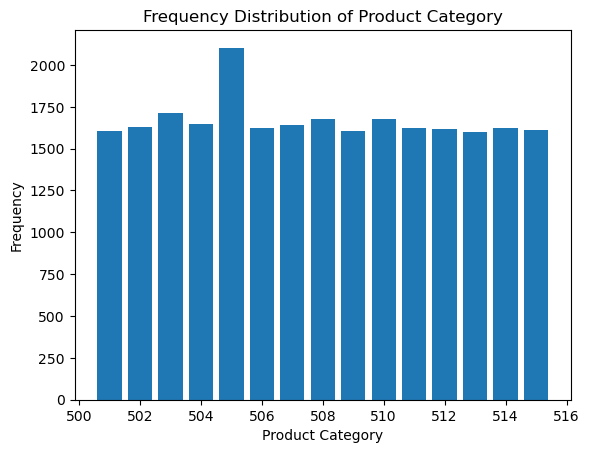

In [9]:
#plt.figure(figsize=(30,15))
plt.bar(df_counted.index,df_counted.values)

plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Product Category')
plt.show()


In [10]:
df_counted1 = df['payment_method'].value_counts()
df_counted1

payment_method
credit    14459
paypal    10540
Name: count, dtype: int64

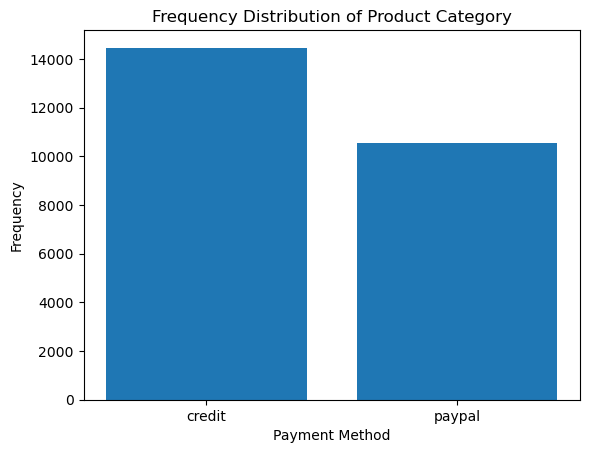

In [11]:
plt.bar(df_counted1.index,df_counted1.values)

plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Product Category')
plt.show()


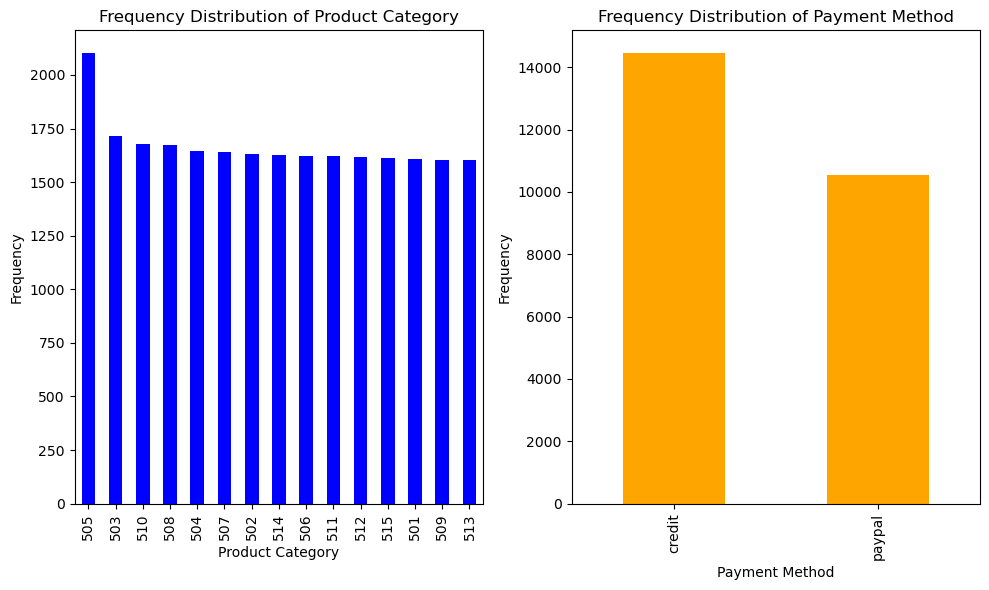

In [12]:
# Frequency distribution for categorical columns
product_category_counts = df['product_category'].value_counts()
payment_method_counts = df['payment_method'].value_counts()

# Create bar charts
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
product_category_counts.plot(kind='bar', color='blue')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Product Category')

plt.subplot(1, 2, 2)
payment_method_counts.plot(kind='bar', color='orange')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Payment Method')

plt.tight_layout()
plt.show()

In [13]:
value_by_product = df.loc[:, ['value [USD]', 'product_category']]
value_by_product = value_by_product.groupby('product_category').sum()
top_5_product = value_by_product.sort_values("value [USD]", ascending=False)[:5]
top_5_product

,value [USD]
product_category,
505,443451.26
506,347301.76
508,347132.42
503,346344.13
507,339178.47


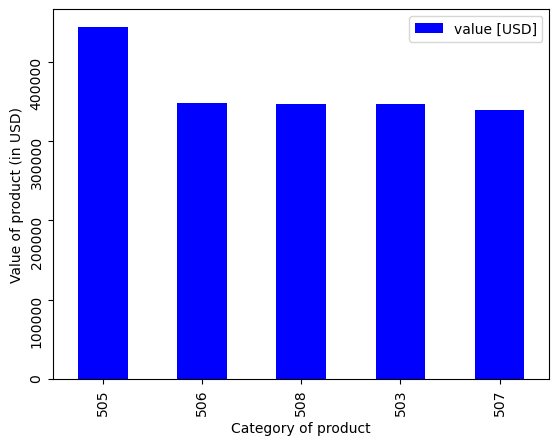

In [14]:
# plt.bar(top_5_product['product_category'], top_5_product['value [USD]'])
top_5_product.plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.xlabel('Category of product')
plt.ylabel('Value of product (in USD)')

plt.show()

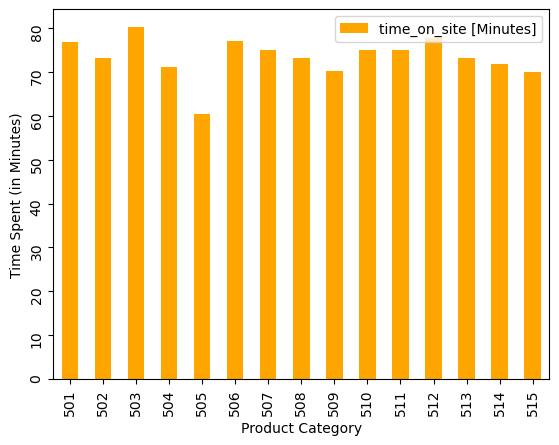

In [15]:
time_by_value = df.loc[:, ['product_category','time_on_site [Minutes]']]

time_by_value = time_by_value.groupby('product_category').mean()
time_by_value.plot(kind='bar', color='orange')
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.xlabel('Product Category')
plt.ylabel('Time Spent (in Minutes)')

plt.show()

In [32]:
total_spend_per_day = df.loc[:, ['day','value [USD]']]
total_spend_per_day = total_spend_per_year.groupby('day').sum()
time_per_day = df.loc[:, ['day','time_on_site [Minutes]']]
time_per_day = time_per_year.groupby('day').mean()






,value [USD]
day,
20,400931.17
21,380325.39
22,401496.13
23,1884586.16
24,63113.88
25,391050.31
26,400089.83
27,368068.34
28,400497.18


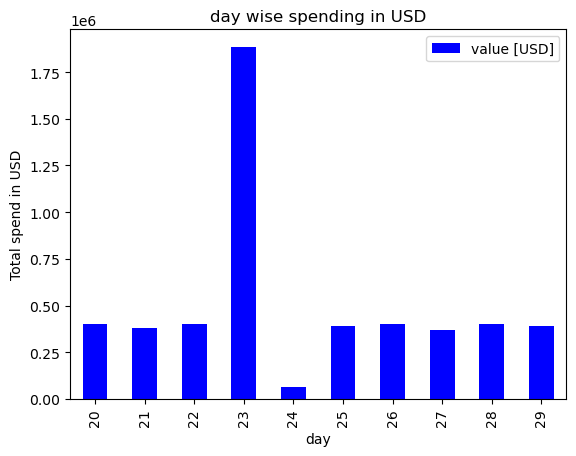

In [33]:
total_spend_per_year.plot(kind='bar', color='blue')
plt.xlabel('day')
plt.ylabel('Total spend in USD')
plt.title('day wise spending in USD')
plt.show()

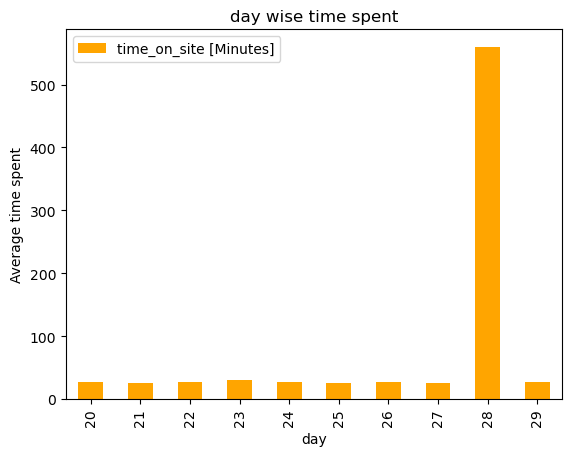

In [34]:
time_per_year.plot(kind='bar', color='orange')
plt.xlabel('day')
plt.ylabel('Average time spent')
plt.title('day wise time spent')
plt.show()

<Axes: >

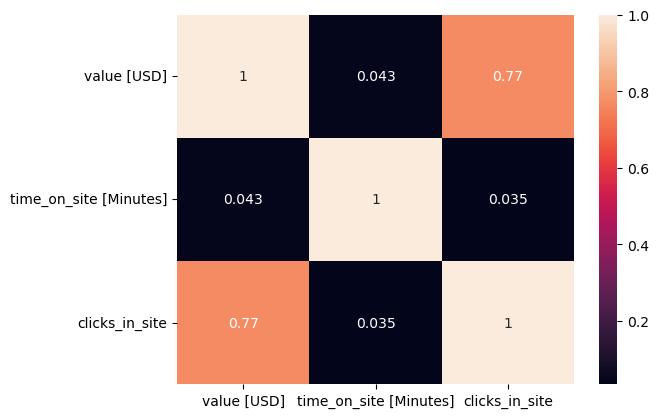

In [36]:
corr = df[['value [USD]', 'time_on_site [Minutes]', 'clicks_in_site']].corr()  
sns.heatmap(corr, annot=True)